In [19]:
## Packages
library(dplyr)
library(stringr)
library(broom)
library(ggplot2)


In [28]:
## Read data in, change path as necessary

# One line per election
elections_2016 <- read.csv("2016_election_results_updated.csv")

# One line per candidate
elections_2016_long <- read.csv("2016_election_results_long.csv")

# One line per election
elections_2018 <- read.csv("2018_election_results_updated.csv")

# One line per candidate
#elections_2018_long <- read.csv("2018_election_results_long.csv")

head(elections_2016)
head(elections_2016_long)
head(elections_2018)


,X,Democrat,Republican,Other,State,Year,District,Democrat.Incumbent,Democrat.Votes,Republican.Incumbent,Republican.Votes,Other.Incumbent,Other.Votes,gender_Dem,gender_Rep,winner_party,winner_gender,Democrat.Vote.Prop,Republican.Vote.Prop
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,Scott J. Kawasaki,No candidate,No candidate,Alaska,2016,1,True,1,False,0,0,0,male,N/A,Democrat,male,1.00000000,0.0000000
2,2,Truno Holdaway,Steve M. Thompson,No candidate,Alaska,2016,2,False,1153,True,3268,0,0,Unknown,male,Republican,male,0.26080072,0.7391993
3,3,Christina M. Sinclair,Tammie Wilson,Jeanne Olson,Alaska,2016,3,False,537,True,4291,False,2270,female,female,Republican,female,0.07565511,0.6045365
4,4,David Guttenberg,No candidate,No candidate,Alaska,2016,4,True,1,False,0,0,0,male,N/A,Democrat,male,1.00000000,0.0000000
5,5,Adam Wool,Aaron Lojewski,No candidate,Alaska,2016,5,True,3812,False,3384,0,0,male,male,Democrat,male,0.52973874,0.4702613
6,6,Jason T. Land,David M. Talerico,No candidate,Alaska,2016,6,False,2327,True,5126,0,0,male,male,Republican,male,0.31222327,0.6877767


,X,Candidate,State,District,Year,Incumbent,Votes,Vote.Prop,Gender,winner_party,Candidate.Party
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,1,Scott J. Kawasaki,Alaska,1,2016,True,1,1.00000000,male,Democrat,Democrat
2,2,Truno Holdaway,Alaska,2,2016,False,1153,0.26080072,Unknown,Republican,Democrat
3,3,Christina M. Sinclair,Alaska,3,2016,False,537,0.07565511,female,Republican,Democrat
4,4,David Guttenberg,Alaska,4,2016,True,1,1.00000000,male,Democrat,Democrat
5,5,Adam Wool,Alaska,5,2016,True,3812,0.52973874,male,Democrat,Democrat
6,6,Jason T. Land,Alaska,6,2016,False,2327,0.31222327,male,Republican,Democrat


,X,state,district,office,candidate_republican,candidate_democrat,total_votes_republican,total_votes_democrat,gender_rep,gender_dem
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,1,Alabama,District 1,State Representative,Phillip Pettus,No candidate,7348,0,male,N/A
2,2,Alabama,District 1,State Senator,Tim Melson,Caroline Self,33141,15830,male,female
3,3,Alabama,District 10,State Representative,Mike Ball,J.B. King,11240,8565,male,Unknown
4,4,Alabama,District 10,State Senator,Andrew Jones,No candidate,25902,0,male,N/A
5,5,Alabama,District 100,State Representative,Victor Gaston,No candidate,12086,0,male,N/A
6,6,Alabama,District 101,State Representative,Chris Pringle,No candidate,10274,0,male,N/A


`summarise()` regrouping output by 'Year' (override with `.groups` argument)

`summarise()` regrouping output by 'Year' (override with `.groups` argument)



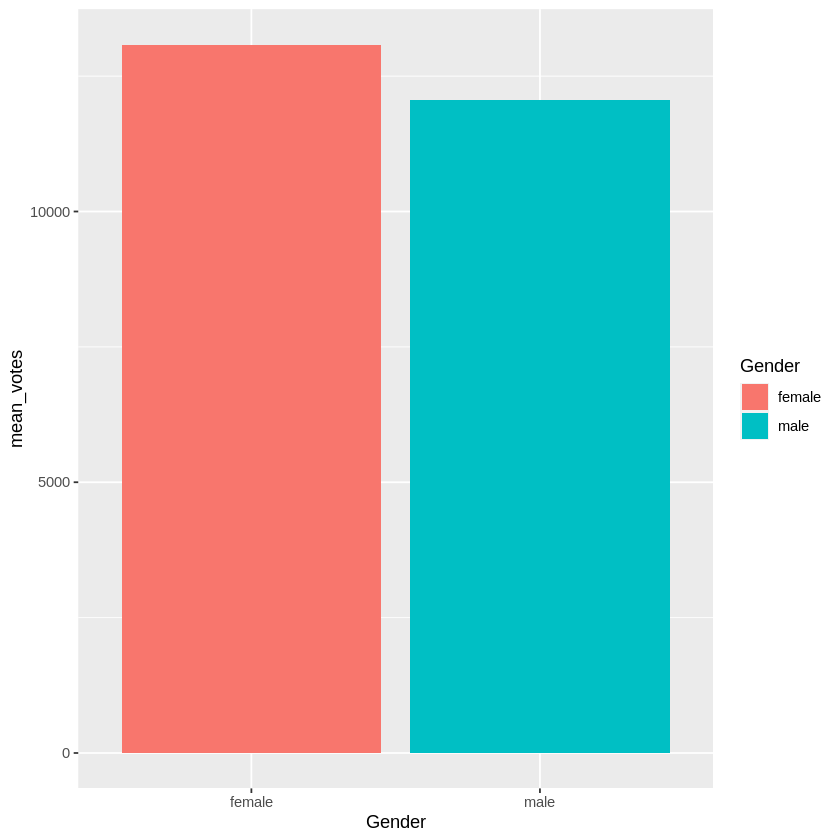

`summarise()` ungrouping output (override with `.groups` argument)



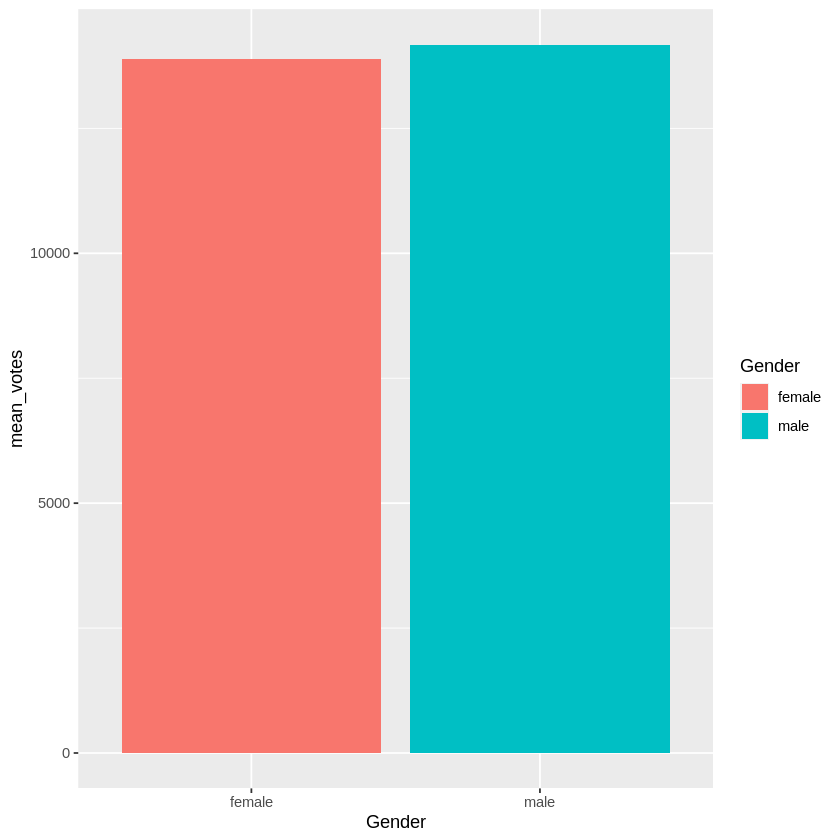

`summarise()` ungrouping output (override with `.groups` argument)



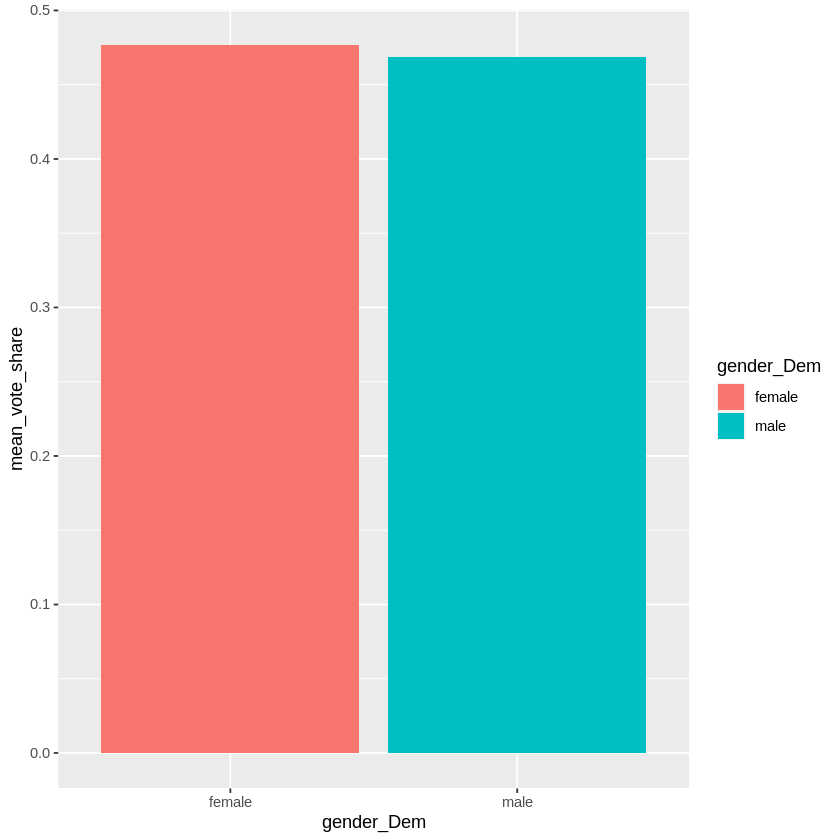

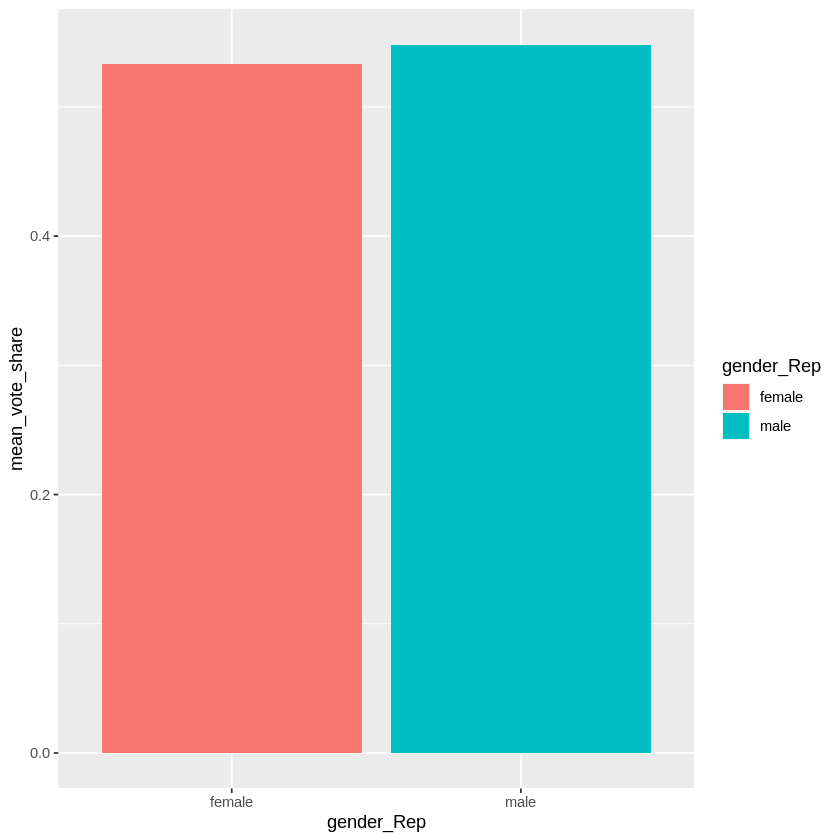

In [35]:
## Basic descriptives for 2016, separated by party

elections_2016_long %>%
    filter(Candidate.Party == "Democrat", Gender %in% c("male", "female"), !is.na(Votes)) %>%
    group_by(Year, Gender) %>%
    summarize(mean_votes = mean(Votes)) %>%
    ggplot(aes(x = Gender, y = mean_votes, fill = Gender)) + 
        geom_bar(stat = "identity")


elections_2016_long %>%
    filter(Candidate.Party == "Republican", Gender %in% c("male", "female"), !is.na(Votes)) %>%
    group_by(Year, Gender) %>%
    summarize(mean_votes = mean(Votes)) %>%
    ggplot(aes(x = Gender, y = mean_votes, fill = Gender)) + 
        geom_bar(stat = "identity")



elections_2016 %>%
    group_by(gender_Dem) %>%
    filter(gender_Dem %in% c("male", "female"), !is.na(Democrat.Vote.Prop), !Democrat.Vote.Prop == 1) %>%
    summarize(count = n(),
              mean_vote_share = mean(Democrat.Vote.Prop)) %>%
    ggplot(aes(x = gender_Dem, y = mean_vote_share, fill = gender_Dem)) + 
        geom_bar(stat = "identity")

elections_2016 %>%
    group_by(gender_Rep) %>%
    filter(gender_Rep %in% c("male", "female"), !is.na(Republican.Vote.Prop), !Republican.Vote.Prop == 1) %>%
    summarize(count = n(),
              mean_vote_share = mean(Republican.Vote.Prop)) %>% 
    ggplot(aes(x = gender_Rep, y = mean_vote_share, fill = gender_Rep)) + 
        geom_bar(stat = "identity")



In [36]:

## Creates list of states where the % diff in gender of winning candidates is > 5% and list the difference
# Doesn't work yet, working on it
elections_2016 %>% 
    filter(gender_Dem %in% c("male", "female"), gender_Rep %in% c("male", "female")) %>%
    group_by(State, District, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    summarize(prop_diff = max(prop) - min(prop)) %>%
    filter(abs(prop_diff) > 0.05)



`summarise()` regrouping output by 'State', 'District' (override with `.groups` argument)

`summarise()` regrouping output by 'State' (override with `.groups` argument)



State,District,prop_diff
<chr>,<chr>,<dbl>


`summarise()` regrouping output by 'Year' (override with `.groups` argument)

`summarise()` regrouping output by 'Year' (override with `.groups` argument)



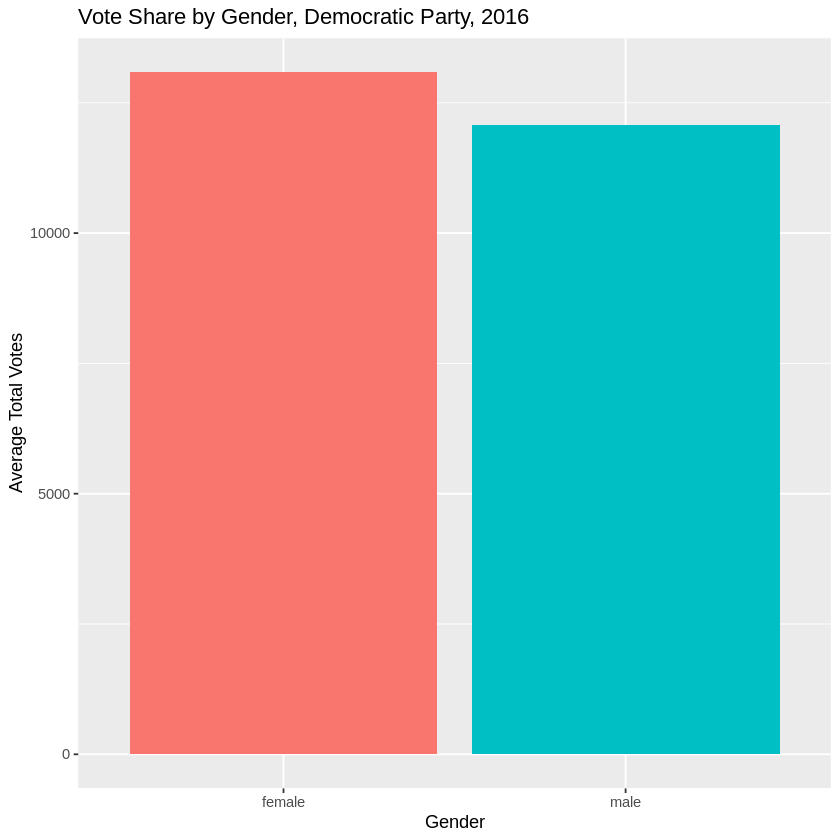

ERROR: Error in eval(lhs, parent, parent): object 'elections_2016_gender' not found


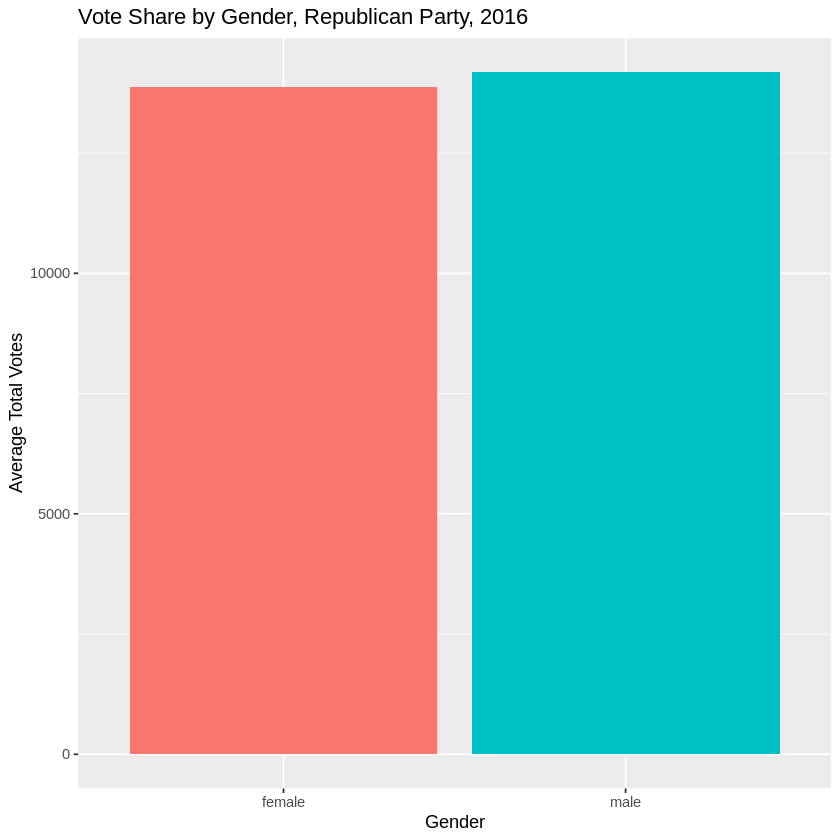

In [39]:
## Graphs (need to change vote total to vote share, vote total is bad stats)

Dem_data %>%
    group_by(Year, gender_Dem) %>%
    filter(gender_Dem %in% c("male", "female"), !is.na(Democrat.Votes)) %>%
    summarize(count = n(), 
              mean_votes = mean(Democrat.Votes)) %>%
    ggplot(aes(x = gender_Dem, y = mean_votes, fill = gender_Dem)) + 
        geom_bar(stat = "identity") + 
        labs(title = "Vote Share by Gender, Democratic Party, 2016",
            y = "Average Total Votes",
            x = "Gender") +
        theme(legend.position = "none")

Rep_data %>%
    group_by(Year, gender_Rep) %>%
    filter(gender_Rep %in% c("male", "female"), !is.na(Republican.Votes)) %>%
    summarize(count = n(),
              mean_votes = mean(Republican.Votes)) %>%
    ggplot(aes(x = gender_Rep, y = mean_votes, fill = gender_Rep)) + 
        geom_bar(stat = "identity") +
        labs(title = "Vote Share by Gender, Republican Party, 2016",
            y = "Average Total Votes",
            x = "Gender") +
        theme(legend.position = "none")


## Tables  (need to work on this whole section, not currently working)
elections_2016_gender %>% 
    filter(gender_Dem %in% c("male", "female"), gender_Rep %in% c("male", "female")) %>%
    group_by(gender_Dem, gender_Rep, winner_party) %>%
    summarize(count = n())

elections_2016_gender %>% 
    filter(gender_Dem %in% c("male", "female"), gender_Rep %in% c("male", "female")) %>%
    group_by(State, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    head()


##Vote Prop of winning candidates
elections_2016 %>% 
    filter(gender_Dem %in% c("male", "female"), gender_Rep %in% c("male", "female")) %>%
    group_by(State, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    head()

elections_2016 %>% 
    filter(gender_Dem %in% c("male", "female"), gender_Rep %in% c("male", "female")) %>%
    group_by(State, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    summarize(prop_diff = max(prop) - min(prop)) %>%
    filter(abs(prop_diff) > 0.05) %>%
    head()
